-------------Section 2: Google+ Network---------------------

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# !pip install igraph
# !pip uninstall igraph -y
!pip install python-igraph==0.9.6
# !pip uninstall python-igraph==0.9.6
# !pip uninstall python-igraph==0.10.4 -y
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 63.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-igraph: filename=python_igraph-0.9.6-cp310-cp310-linux_x86_64.whl size=2555560 sha256=752a9ce1845c23655a5c9353ba287abc6289308aa8cfcb9aa96c40d3c4dcba8a
  Stored in directory: /root/.cache/pip/wheels/ef/14/e6/4f7a42ad0b6bbf5eb65c6358c608065dd3646c2c3b01561e84
Successfully built python-igraph
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for cairocffi: filename=cairocffi-1.5.1-py3-none-any.whl size=90535 sha256=f7f45f08a6b4ada

In [6]:
import os
import igraph as ig
import tarfile
import matplotlib.pyplot as plt

QUESTION (18): how many personal networks?

There are 57 personal networks with more than 2 circles.

In [ ]:
# Question 18 - how many personal networks

# Extract gplus
# archive_path = "/content/gdrive/MyDrive/Colab Notebooks/232/Project_2/gplus.tar.gz"
# with tarfile.open(archive_path, "r:gz") as archive:
#     archive.extractall("/content/gdrive/MyDrive/Colab Notebooks/232/Project_2/temp")

In [7]:
folder_path = "/content/gdrive/MyDrive/Colab Notebooks/232/Project_2/temp/gplus/"
user_ids = []
graphs = []
focus_users = ["109327480479767108490", "115625564993990145546", "101373961279443806744"]
focus_graphs = []
num_gt2 = 0

# Go through files
for file_name in os.listdir(folder_path):
    if file_name.endswith(".circles"):
        with open(os.path.join(folder_path, file_name), "r") as f:
          user_id = file_name[:-8]
          
          # count the circles
          count = 0
          for line in f:
            count+=1

          # more than 2 circles
          if count > 2:
              num_gt2 += 1 #count networks with gt 2 circles
      
              # Check if one of focus users for question 19
              if user_id in focus_users:
                    
                    user_ids.append(user_id)
                    
                    # Go through edge files
                    edges = []
                    vertices = []
                    with open(os.path.join(folder_path, user_id + ".edges"), "r") as f:
                        for line in f:
                            source, target = line.strip().split(" ")
                            if source not in vertices:
                                vertices.append(source)
                            if target not in vertices:
                                vertices.append(target)
                            edges.append((source, target))
                            
                        # create the graph
                        g = ig.Graph(directed=True)
                        g.add_vertices(vertices)
                        g.add_edges(edges)
                        graphs.append(g)

                        # store the 3 graphs for question 19
                        if user_id in focus_users:
                          focus_graphs.append(g)

print("Number personal networks with >2 circles: ", num_gt2)

Number personal networks with >2 circles:  57


QUESTION 19

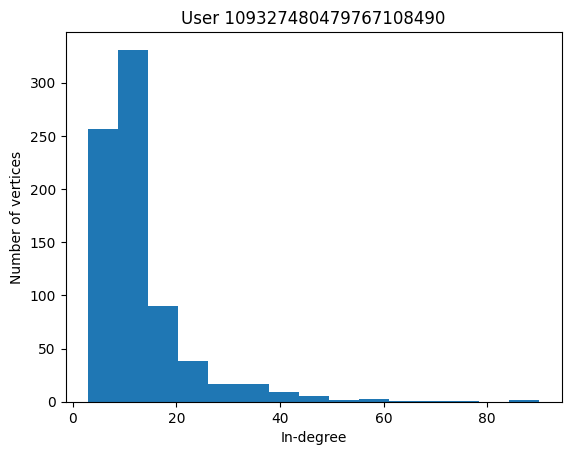

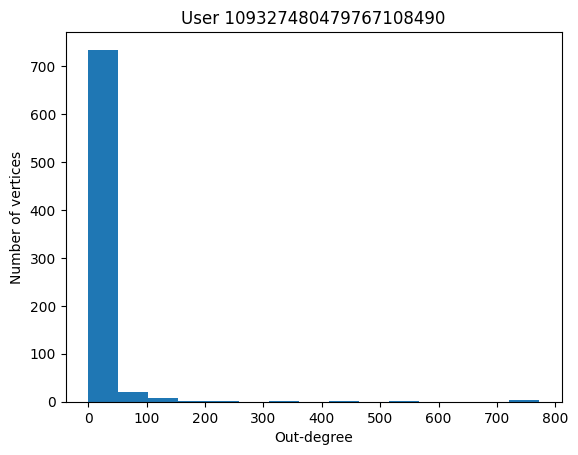

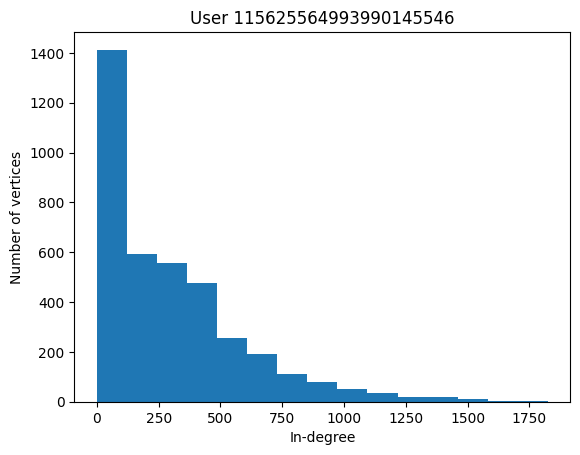

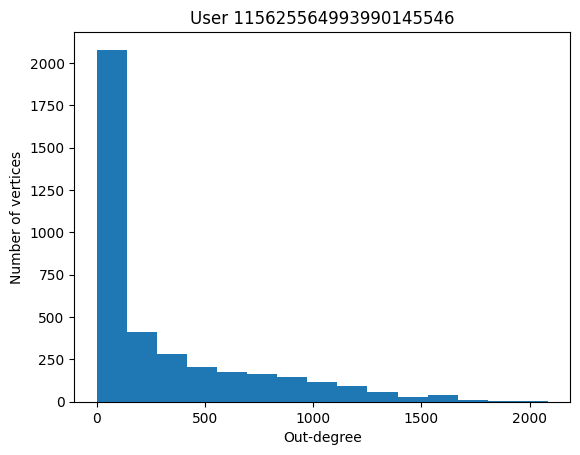

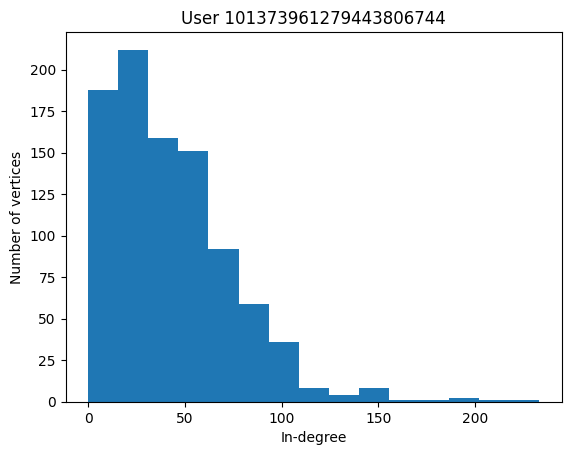

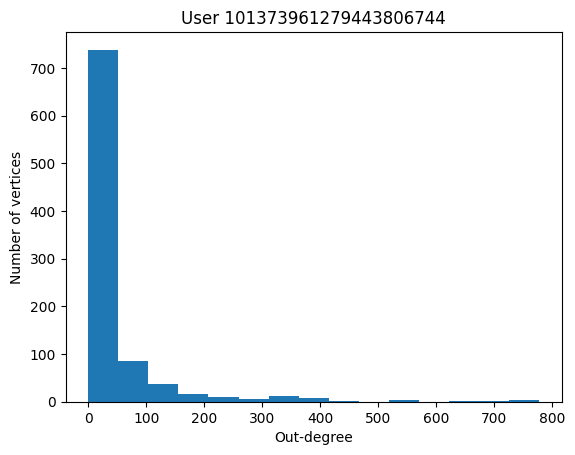

In [8]:
# Question 19 - Plot degree distributions for 
# focus_users = ["109327480479767108490", "115625564993990145546", "101373961279443806744"]

i=0
for user in focus_users:
    in_degrees = focus_graphs[i].indegree()
    out_degrees = focus_graphs[i].outdegree()
    # Plot the in-degree distribution
    plt.hist(in_degrees, bins=15, log=False)
    plt.title("User {}".format(user))
    plt.xlabel("In-degree")
    plt.ylabel("Number of vertices")
    plt.show()
    # Plot the out-degree distribution
    plt.hist(out_degrees, bins=15, log=False)
    plt.title("User {}".format(user))
    plt.xlabel("Out-degree")
    plt.ylabel("Number of vertices")
    plt.show()
    i+=1

QUESTION 20
 - Extract the community structure using Walktrap
 - Report the modularity scores, and plot
 - Are the modularity scores similar?

In [9]:
# Question 20
communities = []

for i, graph in enumerate(focus_graphs):
    # Do Walktrap
    communities.append(graph.community_walktrap(steps=4).as_clustering())

    # calculate the modularity score
    modularity_score = graph.modularity(communities[i])
    print(modularity_score)

    # plot
    layout = graph.layout('auto')
    ig.plot(communities[i], layout=layout, vertex_size=5, edge_width=0.5, bbox=(600, 600), mark_groups=True, target="/content/gdrive/MyDrive/Colab Notebooks/232/Project_2/community_structure"+ str(i) + ".png")
    

0.296234837512884
0.19513713876855965
0.32351081256924946


In [13]:
print(focus_users)

['109327480479767108490', '115625564993990145546', '101373961279443806744']


In [10]:
import numpy as np
community_users = [[],[],[]]
for j,comm in enumerate(community_users):
    community_users[j] = [[] for _ in range(np.max(communities[j].membership)+1)]

    membership = communities[j].membership 
    vertex_names = communities[j].graph.vs['name']  

    for k, vertex in enumerate(vertex_names):
        community_users[j][membership[k]].append(vertex)

QUESTION 21
 
 - From the expressions, h represents homogeneity and c represents completeness.
 - Perfect homogeneity means that all the nodes in a particular cluster have the same class. The clustering algorithm is not perfect, so homogeneity gives us a measure of how close we are to the nodes being the same.
 - Perfect completeness means all the nodes of a particular class are in the same cluster. Completeness tells us how close we are to the nodes of a class being all in the same cluster.

In [ ]:
# Question 21

QUESTION 22

 - compute h and c for the community structures of the 3 personal

In [11]:
# Question 22
users_circles = [[],[],[]]

# Get circles information
for j, user in enumerate(focus_users):
    circle_file = user + ".circles"
    with open(os.path.join(folder_path, circle_file), "r") as f:
        user_id = file_name[:-8]
        
        for line in f:
            circle_name, *users = line.strip().split("\t")
            users_circles[j].append(users)

# create A matrices
community_rows = {}
A_mats = []
for j, comm in enumerate(community_users):
    A_mat= np.zeros((len(comm), len(users_circles[j])))
    for h, cir in enumerate(users_circles[j]):
        for i, com in enumerate(comm):
            for usr in com:
                if(usr in cir):
                    A_mat[i][h]+=1

    A_mats.append(A_mat)

In [12]:
for A in A_mats:

    # total number of people with circle information
    N = np.sum(A)

    # number of people in each circle and community
    aj = np.sum(A, axis=1) # sum rows, num ppl in comm
    bi = np.sum(A, axis=0) # sum cols, num ppl in circle

    # replace 0 values in ai and bi with a small non-zero value
    aj[aj == 0] = 1e-10
    bi[bi == 0] = 1e-10

    # calculate the entropy of circles and communities
    H_C = -np.sum(aj/N * np.log2(aj/N))
    H_K = -np.sum(bi/N * np.log2(bi/N))

    # calculate the conditional entropy
    A_over_b = np.divide(A, bi)
    A_over_a = np.divide(A, aj[:, np.newaxis])
    H_C_given_K = -np.sum(np.nan_to_num(A/N * np.log(A_over_b)), axis=None)
    H_K_given_C = -np.sum(np.nan_to_num(A/N * np.log(A_over_a)), axis=None)

    # calculate homogeneity and completeness
    h = 1 - H_C_given_K/H_C
    c = 1 - H_K_given_C/H_K

    print("Homogeneity: ", h)
    print("Completeness: ", c)


Homogeneity:  0.6942479116656293
Completeness:  0.676205928455033
Homogeneity:  0.3206146918862671
Completeness:  0.30899074153902006
Homogeneity:  0.3220451792059852
Completeness:  0.31484257755453904


<ipython-input-12-42182ca7a2f7>:21: RuntimeWarning: divide by zero encountered in log
  H_C_given_K = -np.sum(np.nan_to_num(A/N * np.log(A_over_b)), axis=None)
<ipython-input-12-42182ca7a2f7>:21: RuntimeWarning: invalid value encountered in multiply
  H_C_given_K = -np.sum(np.nan_to_num(A/N * np.log(A_over_b)), axis=None)
<ipython-input-12-42182ca7a2f7>:22: RuntimeWarning: divide by zero encountered in log
  H_K_given_C = -np.sum(np.nan_to_num(A/N * np.log(A_over_a)), axis=None)
<ipython-input-12-42182ca7a2f7>:22: RuntimeWarning: invalid value encountered in multiply
  H_K_given_C = -np.sum(np.nan_to_num(A/N * np.log(A_over_a)), axis=None)
